In [1]:
from google.colab import drive
drive.mount("/content/gdrive",)

Mounted at /content/gdrive


In [2]:
import os
import sys
os.chdir('/content/gdrive/My Drive/sheep_data')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/My Drive/sheep_data
/content/gdrive/My Drive/sheep_data


In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="data",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

Found 1123 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [6]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [9]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [12]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
10/10 [==============================] - 638s 63s/step - loss: 1636.2854 - accuracy: 0.5375 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 562s 55s/step - loss: 0.5159 - accuracy: 0.8763
Epoch 3/10
10/10 [==============================] - 565s 55s/step - loss: 0.4286 - accuracy: 0.8832
Epoch 4/10
10/10 [==============================] - 616s 61s/step - loss: 0.5113 - accuracy: 0.8344
Epoch 5/10
10/10 [==============================] - 615s 61s/step - loss: 0.4701 - accuracy: 0.8250
Epoch 6/10
10/10 [==============================] - 557s 55s/step - loss: 0.4054 - accuracy: 0.8625
Epoch 7/10
10/10 [==============================] - 609s 61s/step - loss: 0.4631 - accuracy: 0.7969
Epoch 8/10
10/10 [==============================] - 613s 61s/step - loss: 0.4342 - accuracy: 0.8531
Epoch 9/10
10/10 [==============================] - 614s 61s/step - loss: 0.4509 - accuracy: 0.8344
Epoch 10/10
10/10 [==============================] - 61

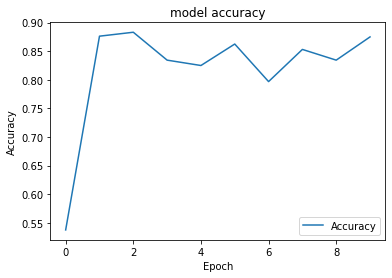

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy"])
plt.show()

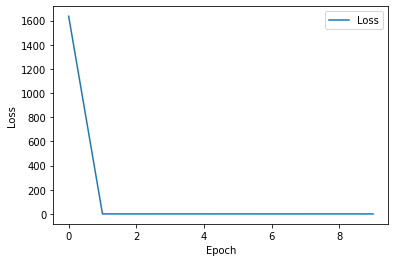

In [20]:
plt.plot(hist.history['loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss"])
plt.show()

In [21]:
model.predict(testdata)

array([[0.06676183, 0.93323815],
       [0.06802999, 0.93197   ],
       [0.06653433, 0.93346566],
       [0.06941603, 0.930584  ],
       [0.07120578, 0.92879415],
       [0.07404906, 0.92595094],
       [0.06872943, 0.9312706 ],
       [0.06505084, 0.93494916],
       [0.06669047, 0.9333095 ],
       [0.07064461, 0.9293554 ],
       [0.06617654, 0.93382347],
       [0.06586096, 0.9341391 ],
       [0.0685156 , 0.93148446],
       [0.06736165, 0.93263835],
       [0.0654142 , 0.93458587],
       [0.06867079, 0.9313292 ],
       [0.07169028, 0.92830974],
       [0.06749713, 0.9325029 ],
       [0.07039547, 0.92960453],
       [0.07152595, 0.92847407]], dtype=float32)